In [22]:
import pm4py
import pandas as pd
import conformance.main as cc
import discovery.main as discovery
import enhancement.main as enhancement
import requests
from utils.requests import fetch_event_log,fetch_bot_model
import json
from utils.bot.parser import get_parser

In [23]:
def getBotInfo(endpoint="http://localhost:8080/SBFManager"):
    """
    Fetches the first bot from the social bot manager and returns its id and name
    """
    response = requests.get(f"{endpoint}/bots")
    if response.status_code == 200:
        data = json.loads(response.content)
        if len(data) == 0:
            return None
        first_value = list(data.values())[0]
        return first_value['id'], first_value['name']
    else:
        return None

In [24]:
bot_manager_endpoint = "https://mobsos.tech4comp.dbis.rwth-aachen.de/SBFManager"
# bot_manager_endpoint = "http://localhost:8080/SBFManager"
bot_id, bot_name = getBotInfo(bot_manager_endpoint)

event_log_generator_endpoint = "https://mobsos.tech4comp.dbis.rwth-aachen.de/event-log"
# event_log_generator_endpoint = "http://localhost:8087"

log = fetch_event_log(bot_name, event_log_generator_endpoint)
if log is None:
    raise ValueError("Event log not found")

log.head()

Fetching event log from https://mobsos.tech4comp.dbis.rwth-aachen.de/event-log/bot/MensaBot


parsing log, completed traces :: 100%|██████████| 28/28 [00:00<00:00, 1227.47it/s]
/Users/lakhoune/Desktop/Repos/process-mining-for-bots/.venv/lib/python3.10/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


,EVENT,REMARKS,RESOURCE,RESOURCE_TYPE,concept:name,in-service-context,lifecycle:transition,serviceEndpoint,time:timestamp,user,case:concept:name
1,USER_MESSAGE,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,greeting,False,complete,NaN,2023-09-09 09:04:07+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,88cc24ec-132a-4ef2-a9b4-36a90d8aed4a
5,USER_MESSAGE,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,menu,False,complete,NaN,2023-09-09 09:04:17+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,3f1cd932-2e38-4157-ae57-03248c6cbce3
7,SERVICE_REQUEST,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,getMenu,NaN,complete,https://mobsos.tech4comp.dbis.rwth-aachen.de/m...,2023-09-09 09:04:18+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,3f1cd932-2e38-4157-ae57-03248c6cbce3
9,USER_MESSAGE,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,menu,False,complete,NaN,2023-09-09 09:04:27+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,844fc8fe-269d-4a23-bd99-757a78a922d0
11,SERVICE_REQUEST,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,getMenu,NaN,complete,https://mobsos.tech4comp.dbis.rwth-aachen.de/m...,2023-09-09 09:04:28+00:00,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...,844fc8fe-269d-4a23-bd99-757a78a922d0


# Discovered Model

In [25]:
traces = pm4py.get_variants(log)
traces

{('startReview', 'quit', 'startReview'): 1,
 ('greeting',): 4,
 ('menu', 'getMenu', 'confirmation', 'getMenu'): 1,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'number_selection',
  'prepareReview'): 3,
 ('menu', 'getMenu'): 4,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'rejection'): 1,
 ('confirmation',): 5,
 ('quit',): 2,
 ('menu',
  'getMenu',
  'menu',
  'getMenu',
  'number_selection',
  'getMenu',
  'number_selection',
  'getMenu'): 1,
 ('menu', 'getMenu', 'number_selection', 'getMenu'): 2,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'rejection',
  'confirmation',
  'chooseMensaAndMeal',
  'number_selection',
  'prepareReview',
  'prepareReview',
  'rejection',
  'confirmation',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'number_selection',
  'prepareReview'): 1,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'rejection',
  'rejection'): 1,
 ('number_select

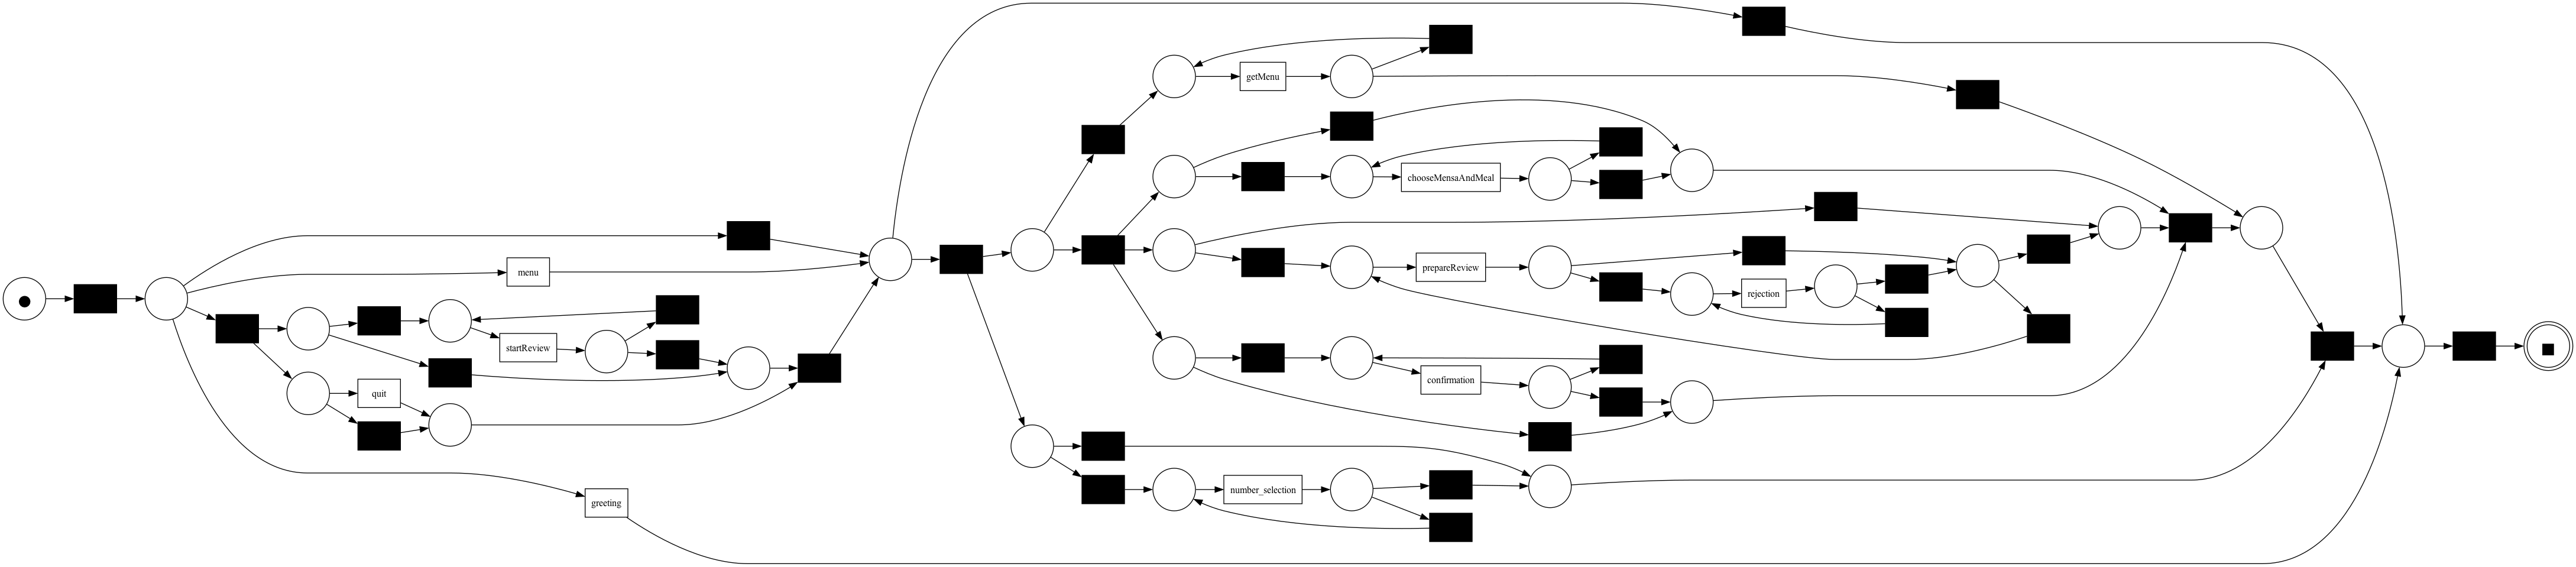

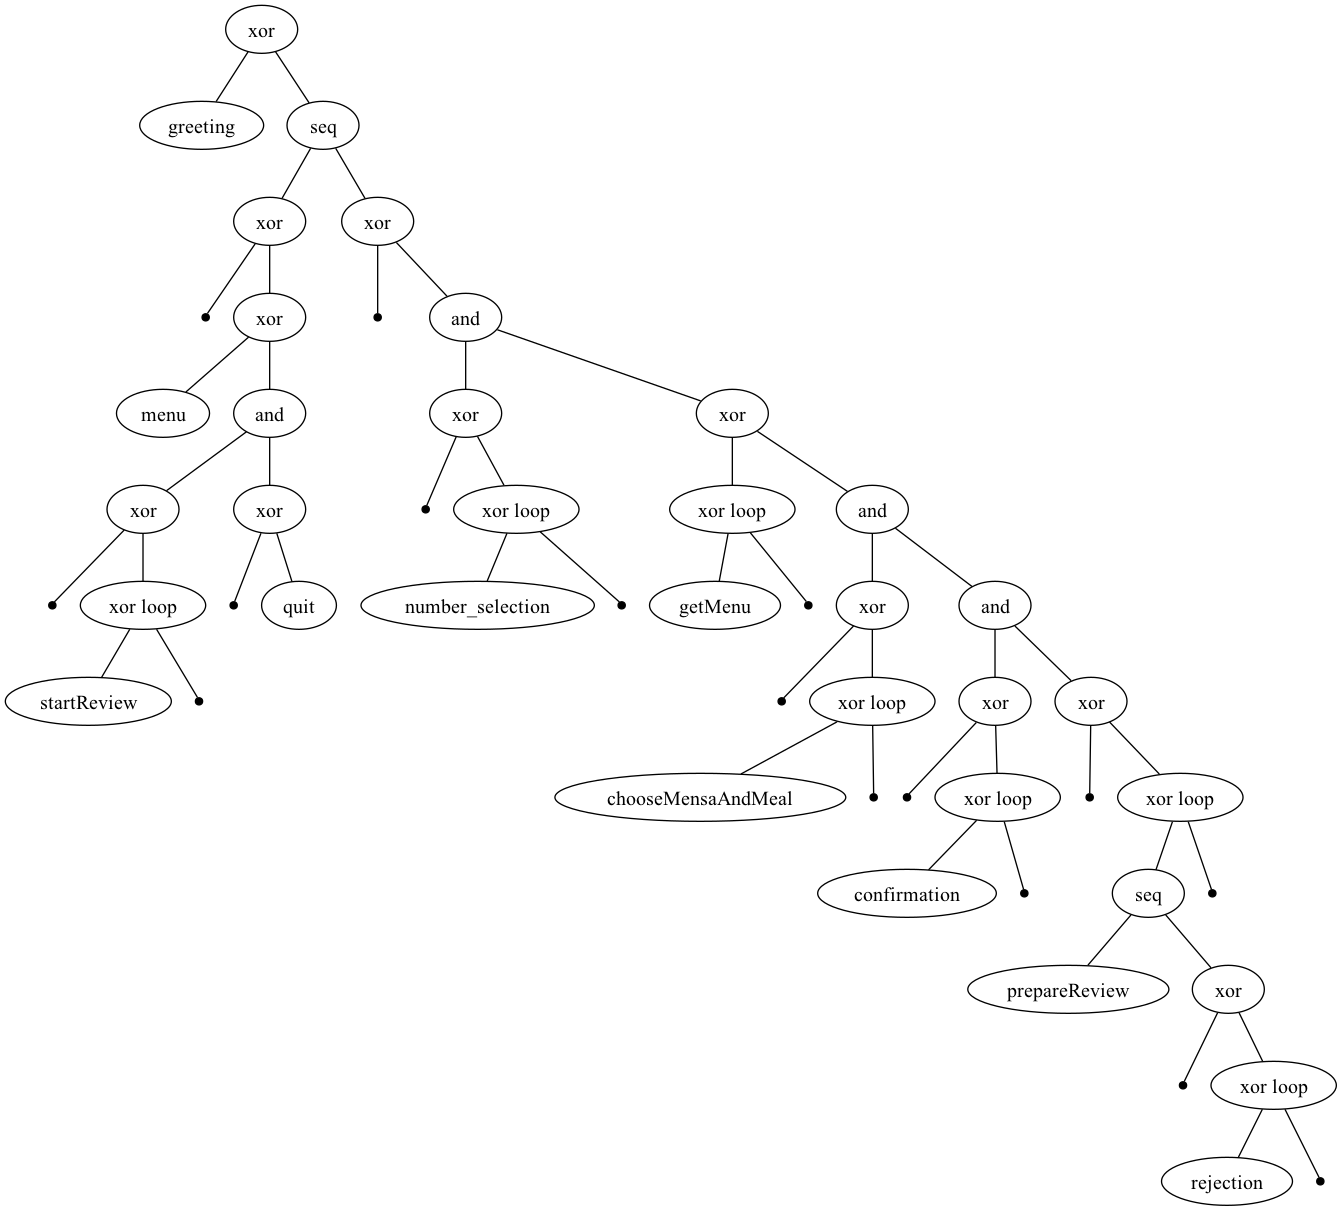

In [26]:
log = pm4py.filter_variants_top_k(log, 10)

net,im,fm = discovery.discover_petri_net(log)
pm4py.view_petri_net(net,im,fm)
process_tree = discovery.discover_process_tree(log)
pm4py.view_process_tree(process_tree)
# bpmn = process_discovery.discover_bpmn(log)
# pm4py.view_bpmn(bpmn)

In [27]:
traces = pm4py.get_variants(log)
traces

{('startReview', 'quit', 'startReview'): 1,
 ('greeting',): 4,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'number_selection',
  'prepareReview'): 3,
 ('menu', 'getMenu'): 4,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'rejection'): 1,
 ('confirmation',): 5,
 ('quit',): 2,
 ('menu', 'getMenu', 'number_selection', 'getMenu'): 2,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'rejection',
  'confirmation',
  'chooseMensaAndMeal',
  'number_selection',
  'prepareReview',
  'prepareReview',
  'rejection',
  'confirmation',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'number_selection',
  'prepareReview'): 1,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'rejection',
  'rejection'): 1}

# Bot Model

Fetching bot model from https://mobsos.tech4comp.dbis.rwth-aachen.de/SBFManager/models/MensaBot


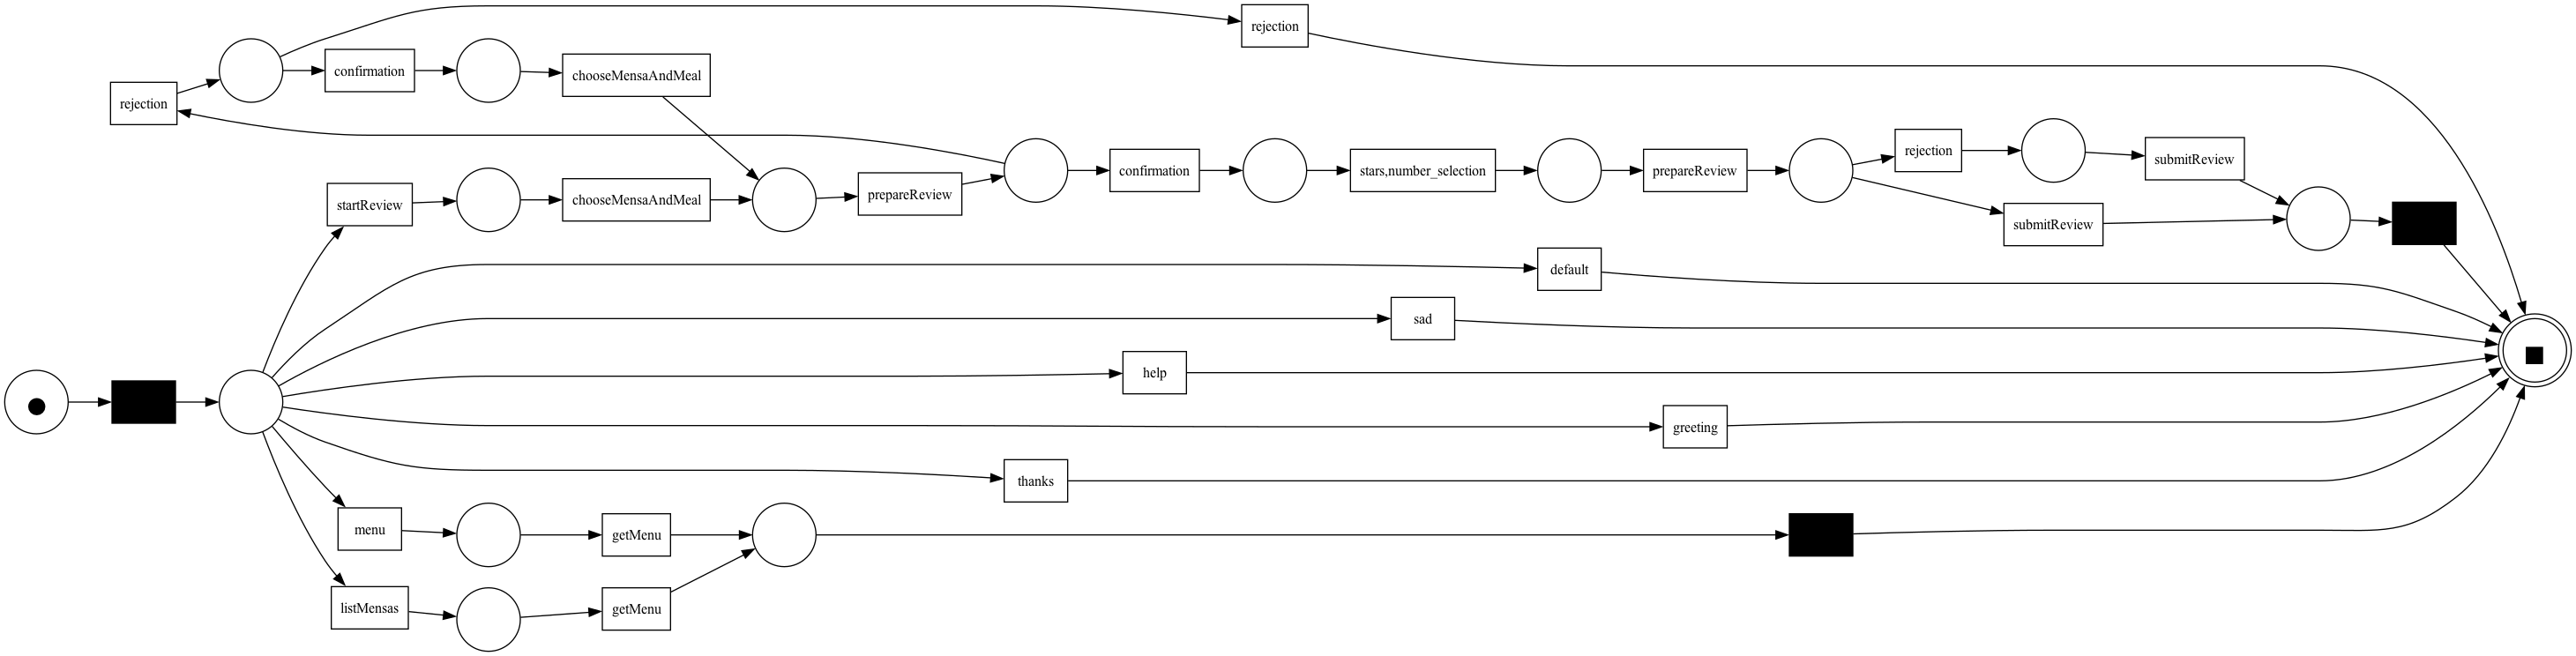

In [28]:
model = fetch_bot_model(bot_name,bot_manager_endpoint)
bp = get_parser(model)
bot_net,bot_im,bot_fm= bp.to_petri_net()
dfg,start_activities,end_activities = bp.get_dfg()
bot_net=pm4py.reduce_petri_net_invisibles(bot_net)
pm4py.view_petri_net(bot_net,bot_im,bot_fm)


In [29]:
unfitting_traces = cc.find_unfitting_traces(log, bot_net, bot_im, bot_fm)
missing_log_moves = list()
for trace in unfitting_traces:
    for move in trace['alignment']:
        if move[0] == ">>" and move[1]!= None:
            missing_log_moves.append(move[1])


aligning log, completed variants :: 100%|██████████| 10/10 [00:00<00:00, 405.74it/s]


In [30]:

print(f"Missing log moves: {missing_log_moves}")

Missing log moves: ['sad', 'stars,number_selection', 'submitReview', 'rejection', 'sad', 'sad', 'sad', 'stars,number_selection', 'submitReview', 'sad', 'stars,number_selection', 'submitReview', 'sad', 'stars,number_selection', 'submitReview', 'sad', 'sad']


aligning log, completed variants :: 100%|██████████| 10/10 [00:00<00:00, 402.41it/s]


aligning log, completed variants :: 100%|██████████| 10/10 [00:00<00:00, 224.81it/s]


{('chooseMensaAndMeal', 'number_selection'): {'mean': 0.0, 'median': 0.0, 'max': 0.0, 'min': 0.0, 'sum': 0.0, 'stdev': nan}, ('chooseMensaAndMeal', 'prepareReview'): {'mean': 1.4285714285714286, 'median': 2.0, 'max': 2.0, 'min': 0.0, 'sum': 10.0, 'stdev': 0.9759000729485332}, ('confirmation', 'chooseMensaAndMeal'): {'mean': 5.0, 'median': 5.0, 'max': 5.0, 'min': 5.0, 'sum': 10.0, 'stdev': 0.0}, ('confirmation', 'number_selection'): {'mean': 8.75, 'median': 7.5, 'max': 15.0, 'min': 5.0, 'sum': 35.0, 'stdev': 4.7871355387816905}, ('confirmation', 'rejection'): {'mean': 10.0, 'median': 10.0, 'max': 10.0, 'min': 10.0, 'sum': 10.0, 'stdev': nan}, ('getMenu', 'number_selection'): {'mean': 6.5, 'median': 6.5, 'max': 9.0, 'min': 4.0, 'sum': 13.0, 'stdev': 3.5355339059327378}, ('menu', 'getMenu'): {'mean': 2.0, 'median': 1.0, 'max': 5.0, 'min': 1.0, 'sum': 12.0, 'stdev': 1.6733200530681511}, ('number_selection', 'getMenu'): {'mean': 0.5, 'median': 0.5, 'max': 1.0, 'min': 0.0, 'sum': 1.0, 'stdev

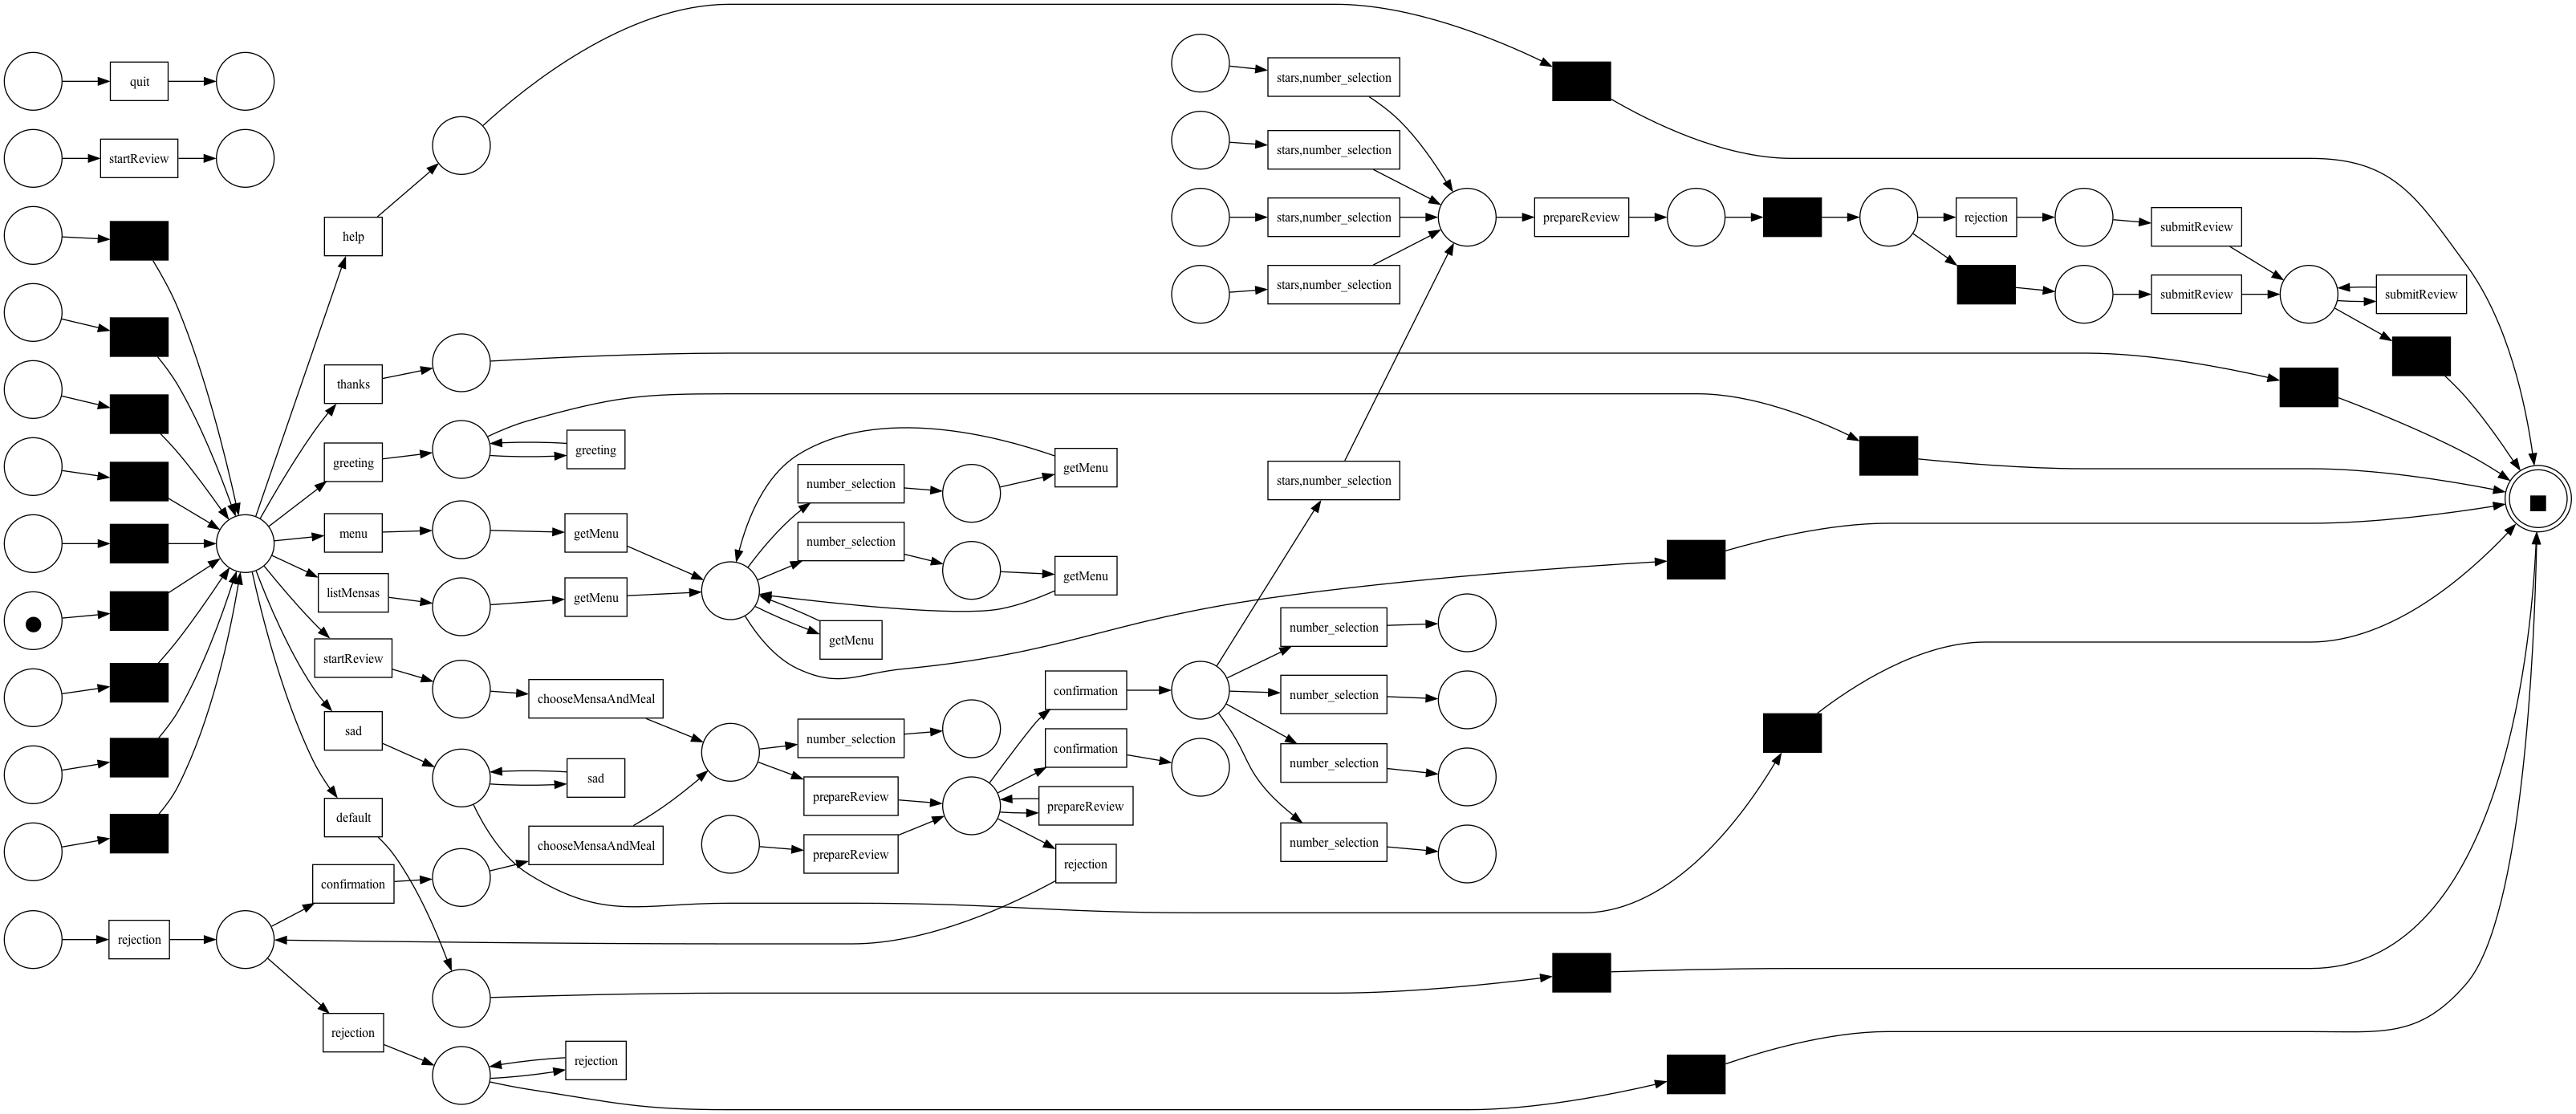

In [31]:
enhanced_model,start_activities,end_activities,_ = enhancement.enhance_bot_model(log, bp)
bot_net,bot_im,bot_fm=bp.to_petri_net(enhanced_model,start_activities,end_activities)
pm4py.view_petri_net(bot_net,bot_im,bot_fm)